<a href="https://colab.research.google.com/github/HareeshVutla/Deeplearning/blob/main/Image_classification_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models


In [3]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    'cifar10',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompletePHY5CX/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompletePHY5CX/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [4]:
print("training_images_size :",img_train.shape)
print("training_labels_size :",label_train.shape)
print("testing_images_size  :",img_test.shape)
print("testing_labels_size  :",label_test.shape)

training_images_size : (50000, 32, 32, 3)
training_labels_size : (50000,)
testing_images_size  : (10000, 32, 32, 3)
testing_labels_size  : (10000,)


In [5]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [6]:
def plot_sample (img_train, label_train, index):
  plt.imshow(img_train[index])
  plt.xlabel(classes[label_train[index]])

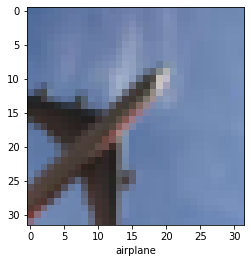

In [7]:
plot_sample(img_train, label_train, 20)

In [8]:
img_train = img_train/255
img_test = img_test/255


# **Simple ANN**

In [19]:
ANN = models.Sequential([layers.Flatten(input_shape= (32,32,3)),
                         layers.Dense(3000, activation = 'relu'),
                         layers.Dense(1000, activation = 'relu'),
                         layers.Dense(10,activation = 'sigmoid')])

ANN.compile(optimizer = 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ANN.fit(img_train, label_train, epochs = 4)

Epoch 1/4
1563/1563 [==============================] - 111s 71ms/step - loss: 1.8067 - accuracy: 0.3560
Epoch 2/4
1563/1563 [==============================] - 109s 70ms/step - loss: 1.6210 - accuracy: 0.4295
Epoch 3/4
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5397 - accuracy: 0.4565
Epoch 4/4
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4815 - accuracy: 0.4792


In [20]:
ANN.evaluate (img_test, label_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.5008 - accuracy: 0.4656


[1.5008249282836914, 0.46560001373291016]

In [23]:
CNN = models.Sequential([
                         # CNN
                         layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3) ),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu' ),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu' ),
                         layers.MaxPooling2D((2,2)),

                         # Dense
                         
                         layers.Flatten(),
                         layers.Dense(64, activation = 'relu'),
                         layers.Dense(10,activation = 'softmax')])


In [24]:
CNN.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
CNN.fit(img_train, label_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 1.5209 - accuracy: 0.4421
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1421 - accuracy: 0.5931
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9895 - accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.8830 - accuracy: 0.6924
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8029 - accuracy: 0.7202
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7383 - accuracy: 0.7437
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6823 - accuracy: 0.7623
Epoch 8/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6411 - accuracy: 0.7753
Epoch 9/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.5972 - accuracy: 0.7913
Epoch 10/10
1563/1563 [==============================] - 75s 48m

In [26]:
CNN.evaluate(img_test, label_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9329 - accuracy: 0.7063


[0.9328703284263611, 0.7063000202178955]

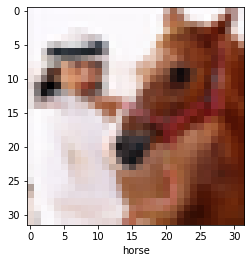

In [29]:
plot_sample (img_test, label_test,150)


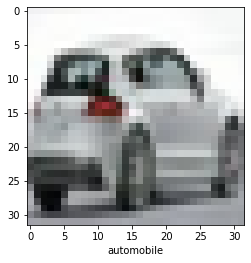

In [36]:
plot_sample (img_test, label_test,5)

In [37]:
img_pred = CNN.predict (img_test)
print(img_pred[:5])

[[1.6713636e-02 7.3729130e-04 7.7303439e-02 3.4359261e-01 2.3386379e-01
  1.2597410e-01 6.8589994e-03 1.9378172e-01 1.0570354e-03 1.1744323e-04]
 [1.4580106e-02 8.0020732e-01 3.5894121e-07 2.0592319e-05 1.3220542e-08
  4.4766319e-05 4.5706275e-07 8.1211710e-06 1.7097157e-01 1.4166621e-02]
 [1.4005121e-04 1.3766628e-04 1.1085400e-01 3.4513537e-02 2.6187754e-01
  3.6528725e-03 5.8693379e-01 1.6584097e-03 2.5831796e-05 2.0628252e-04]
 [4.3070707e-02 7.6077301e-03 1.1877989e-04 1.5881286e-03 8.4002466e-05
  1.1230196e-04 7.3794014e-04 5.5891176e-04 1.6887136e-01 7.7725011e-01]
 [2.1431607e-07 7.5047115e-05 2.1920085e-03 1.9377364e-02 1.2576515e-06
  9.0126228e-01 3.7632129e-04 7.6397605e-02 3.1764299e-04 1.1108843e-07]]


In [38]:
label_classes = [np.argmax(element) for element in img_pred]
print(label_classes[:5])

[3, 1, 6, 9, 5]


'automobile'

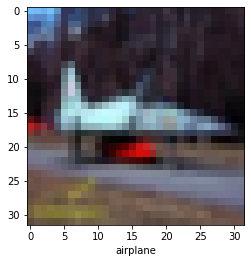

In [45]:
plot_sample(img_test, label_test, 1)
classes[label_classes[1]]


'automobile'

'truck'

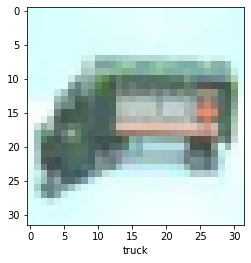

In [44]:
plot_sample(img_test, label_test, 3)
classes[label_classes[3]]

# **classification report**

In [47]:
from sklearn.metrics import confusion_matrix, classification_report


In [49]:
print("classification Report: \n", classification_report(label_test,label_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.75      0.73      1000
           1       0.79      0.89      0.84      1000
           2       0.73      0.49      0.59      1000
           3       0.52      0.58      0.54      1000
           4       0.73      0.56      0.63      1000
           5       0.54      0.69      0.61      1000
           6       0.79      0.74      0.76      1000
           7       0.78      0.74      0.76      1000
           8       0.72      0.88      0.79      1000
           9       0.84      0.75      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000

